# Apartments - Barra da Tijuca

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

df = pd.read_csv('H:\\projects\\python\\lab\\real_estate_barra.csv')

###  Column : m2

In [2]:
df['price_per_m2'] = df['price']/df['area']
df = df.query('area > 20')

###  Column : street

In [3]:
df['street'] = df['address'].apply(lambda x: x.split(',')[0].split('-')[0].strip())
all_data = df.drop(columns=['address'])
all_data = all_data.dropna()
all_data.street = all_data.street.apply(lambda x: x.strip())

In [4]:
all_data.head()

,bedrooms,area,price,price_per_m2,street
0,4,165,2500000,15151.515152,Avenida Lúcio Costa
1,1,55,750000,13636.363636,Avenida Lúcio Costa
2,3,128,680000,5312.500000,Avenida Embaixador Abelardo Bueno
3,2,70,960000,13714.285714,Rua Jornalista Henrique Cordeiro
4,2,72,1100000,15277.777778,Avenida Lúcio Costa


### Group by number of bedrooms

In [5]:
all_data.groupby('bedrooms')['bedrooms'].agg('count')

bedrooms
1     457
2    2611
3    2486
4    2518
5     327
6      30
7       5
9       1
Name: bedrooms, dtype: int64

### Most Expensive by price

In [6]:
all_data.iloc[df['price'].argmax()]

bedrooms                      6
area                        763
price                  60000000
price_per_m2       78636.959371
street          Barra da Tijuca
Name: 5169, dtype: object

### Most Expensive by m2

In [7]:
all_data.iloc[df['price_per_m2'].argmax()]

bedrooms                      6
area                        763
price                  60000000
price_per_m2       78636.959371
street          Barra da Tijuca
Name: 5169, dtype: object

### Group by unit size

In [8]:
( 
  all_data.groupby('area')
   .price.agg(['count'])
   .query('count > 0')
   .sort_values('count', ascending=False)
).head(10)

,count
area,
70,189
78,176
90,165
85,152
160,152
80,148
110,143
100,138
91,115


### Number of units per street

In [9]:
all_data.groupby('street')['street'].agg('count').sort_values(ascending=False).head(30)

street
Barra da Tijuca                             1595
Avenida Lúcio Costa                         1069
Avenida das Américas                         496
Avenida Flamboyants da Península             482
Avenida Embaixador Abelardo Bueno            329
Avenida Prefeito Dulcídio Cardoso            301
Avenida das Acácias da Península             258
Rua Alfredo Ceschiatti                       257
Avenida Vice                                 234
Rua Jacarandás da Península                  187
Rua César Lattes                             163
Avenida Salvador Allende                     153
Rua Escritor Rodrigo Melo Franco             132
Rua Jornalista Henrique Cordeiro             129
Rua das Bromélias da Península                95
Rua Mário Agostinelli                         90
Avenida Rosauro Estellita                     81
Rua Franco Zampari                            80
Avenida Pepe                                  75
Rua Coronel Paulo Malta Rezende               70
Avenida Marec

In [10]:
street_stats = all_data['street'].value_counts(ascending=False)
street_stats
location_stats_less_than_10 = street_stats[street_stats<=10]
all_data.street = all_data.street.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
all_data.head(100)

,bedrooms,area,price,price_per_m2,street
0,4,165,2500000,15151.515152,Avenida Lúcio Costa
1,1,55,750000,13636.363636,Avenida Lúcio Costa
2,3,128,680000,5312.500000,Avenida Embaixador Abelardo Bueno
3,2,70,960000,13714.285714,Rua Jornalista Henrique Cordeiro
4,2,72,1100000,15277.777778,Avenida Lúcio Costa
...,...,...,...,...,...
96,5,145,1600000,11034.482759,Avenida Vice
97,3,138,1450000,10507.246377,Avenida Comandante Júlio de Moura
98,2,130,1600000,12307.692308,Barra da Tijuca
99,2,78,543500,6967.948718,Avenida Vice


### Most valuable street

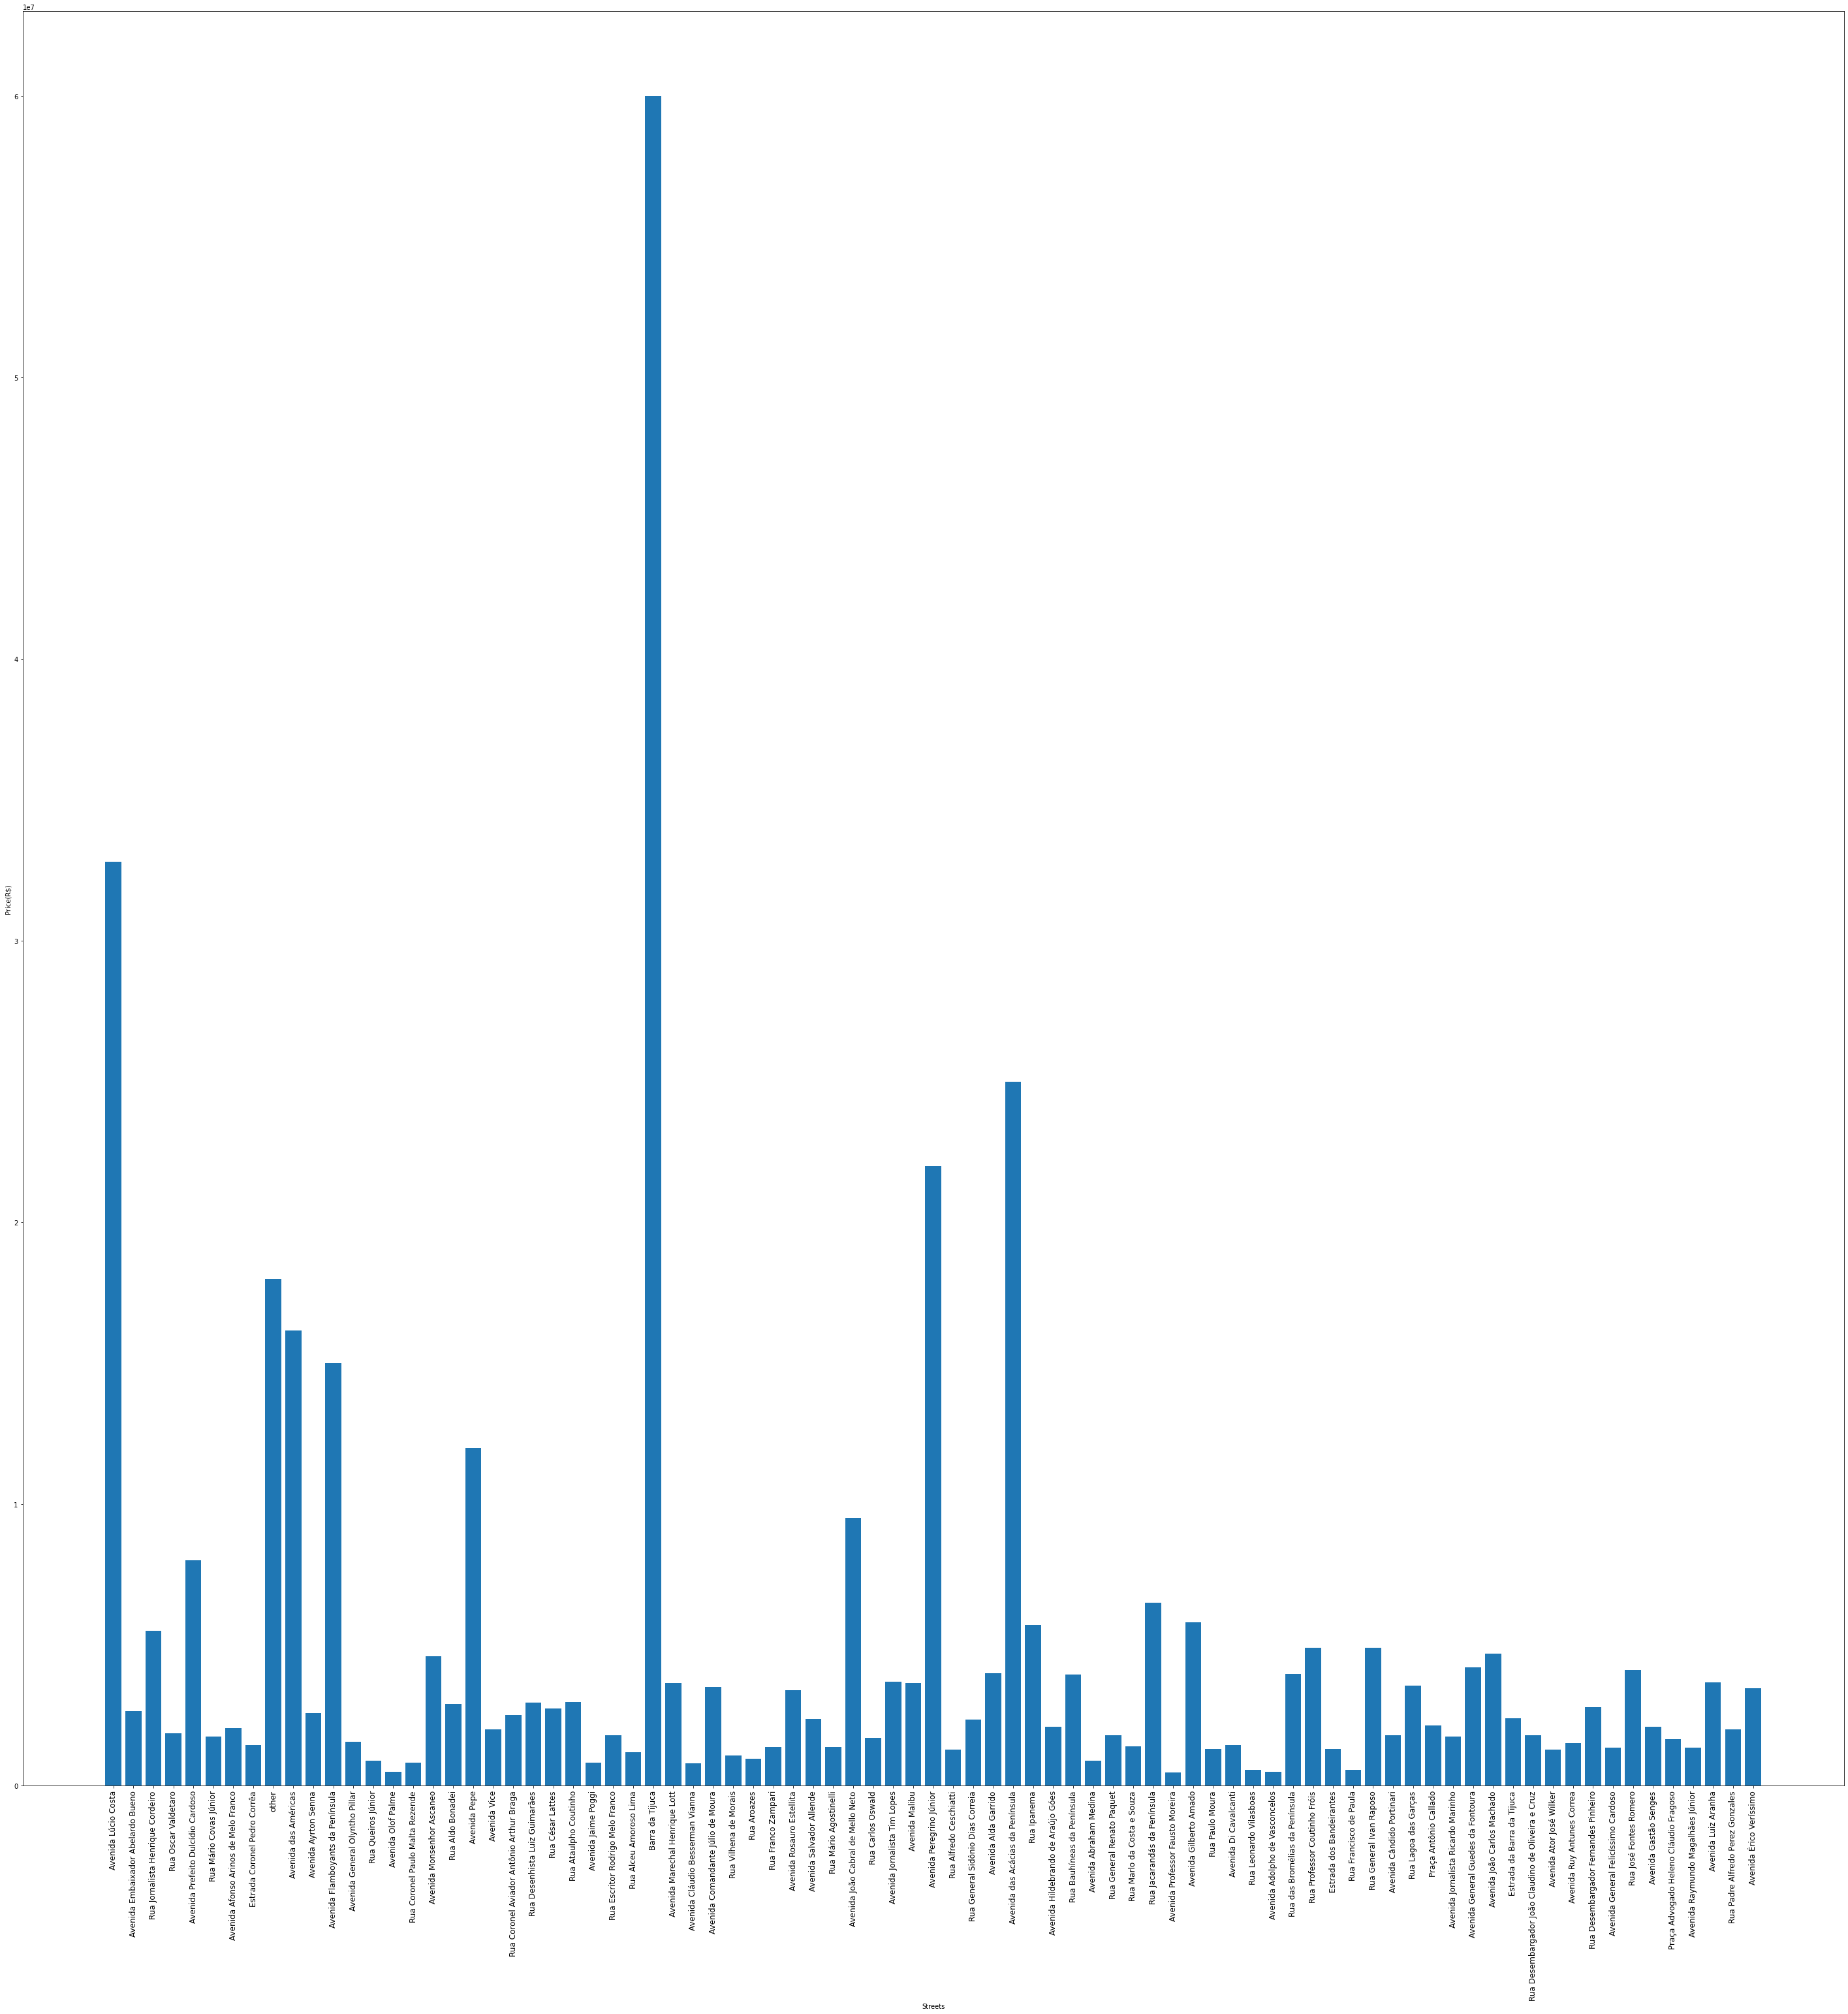

In [11]:
y_values = all_data.groupby(['street'], sort=False)['price'].max()

x_values = [street for street, df in all_data.groupby(['street'], sort=False)]

plt.figure(figsize=(50,50))

plt.bar(x_values, y_values)
plt.xticks(x_values, rotation='vertical', size=12)
plt.ylabel('Price(R$)')
plt.xlabel('Streets')

plt.show()

### Street with most units for sale

In [12]:
( 
  all_data.groupby('street')
   .price.agg(['count', 'max'])
   .query('count > 0')
   .sort_values('count', ascending=False)
)

,count,max
street,,
Barra da Tijuca,1595,60000000
Avenida Lúcio Costa,1069,32800000
Avenida das Américas,496,16172228
Avenida Flamboyants da Península,482,15000000
other,387,18000000
...,...,...
Praça Advogado Heleno Cláudio Fragoso,13,1650000
Rua Desembargador Fernandes Pinheiro,12,2800000
Avenida Érico Veríssimo,11,3450000


In [13]:
all_data.area.describe()

count    8435.000000
mean      164.639360
std       144.450174
min        30.000000
25%        83.000000
50%       120.000000
75%       200.000000
max      5000.000000
Name: area, dtype: float64

In [14]:
all_data.price_per_m2.describe()

count     8435.000000
mean     11101.231654
std       4398.031686
min        713.147410
25%       8479.853480
50%      10489.510490
75%      12333.333333
max      78636.959371
Name: price_per_m2, dtype: float64

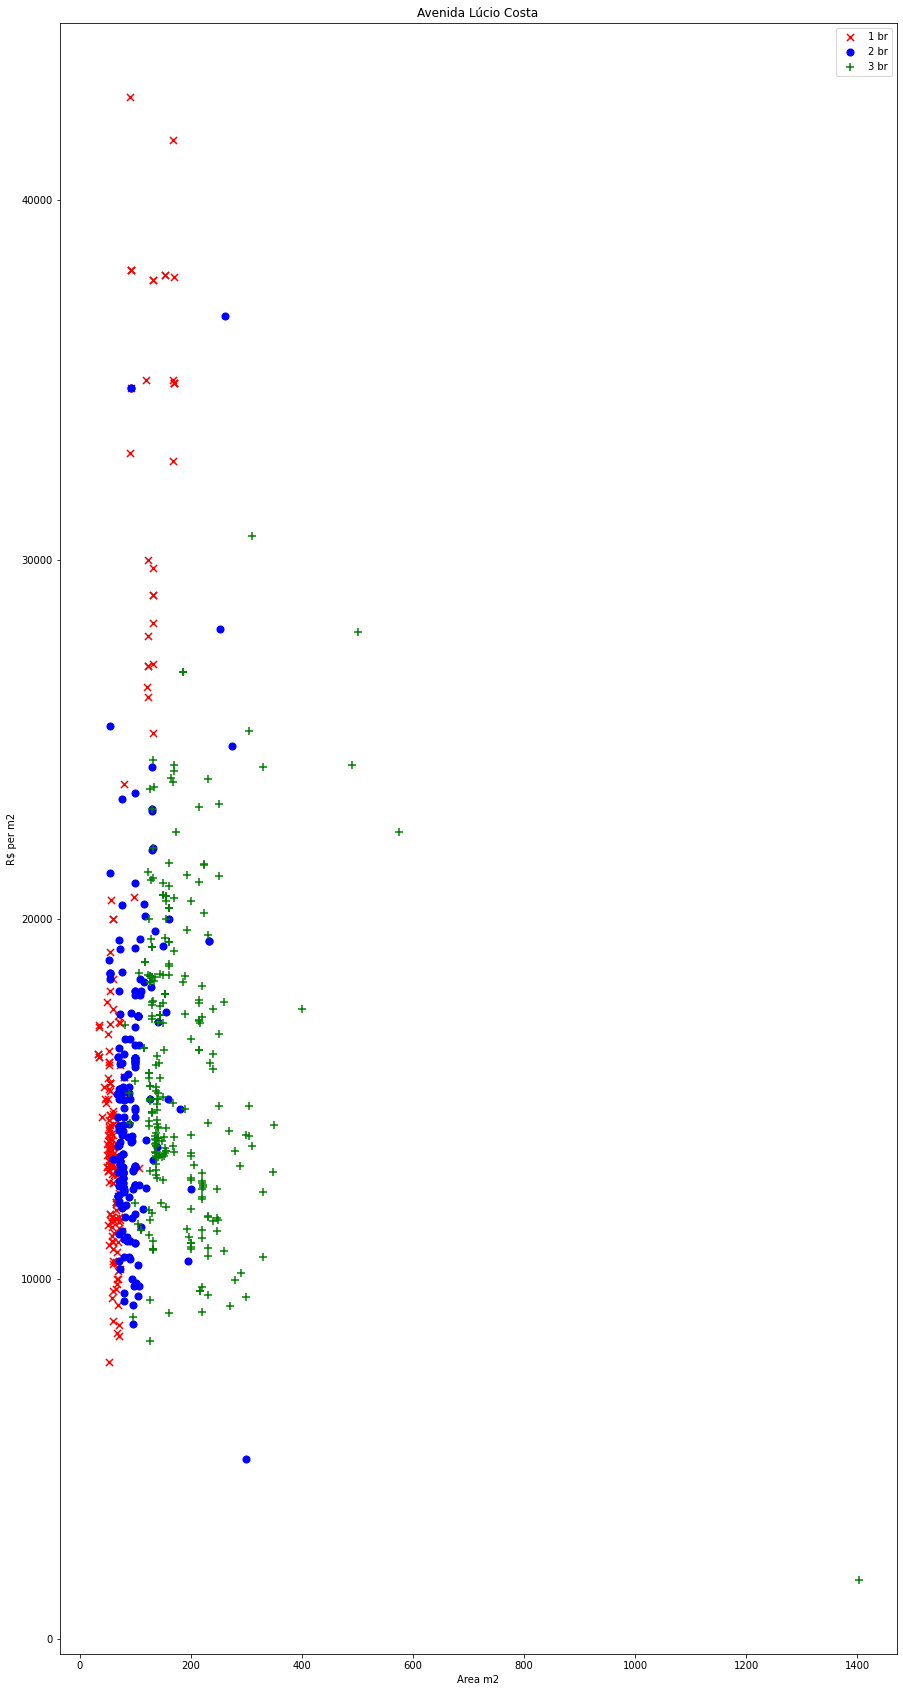

In [15]:
def plot_scatter_chart(df, street):
    bd1 = df[(df.street == street) & (df.bedrooms ==1)]
    bd2 = df[(df.street == street) & (df.bedrooms ==2)]
    bd3 = df[(df.street == street) & (df.bedrooms ==3)]
    matplotlib.rcParams['figure.figsize'] = (15,30)
    plt.scatter(bd1.area,bd1.price_per_m2, marker='x', color='red',label='1 br', s=50)    
    plt.scatter(bd2.area,bd2.price_per_m2, color='blue',label='2 br', s=50)
    plt.scatter(bd3.area,bd3.price_per_m2, marker='+', color='green',label='3 br', s=50)
    plt.xlabel('Area m2')
    plt.ylabel('R$ per m2')
    plt.title(street)
    plt.legend()
    
plot_scatter_chart(all_data, 'Avenida Lúcio Costa')

Text(0.5, 1.0, 'Histogram - Bedrooms')

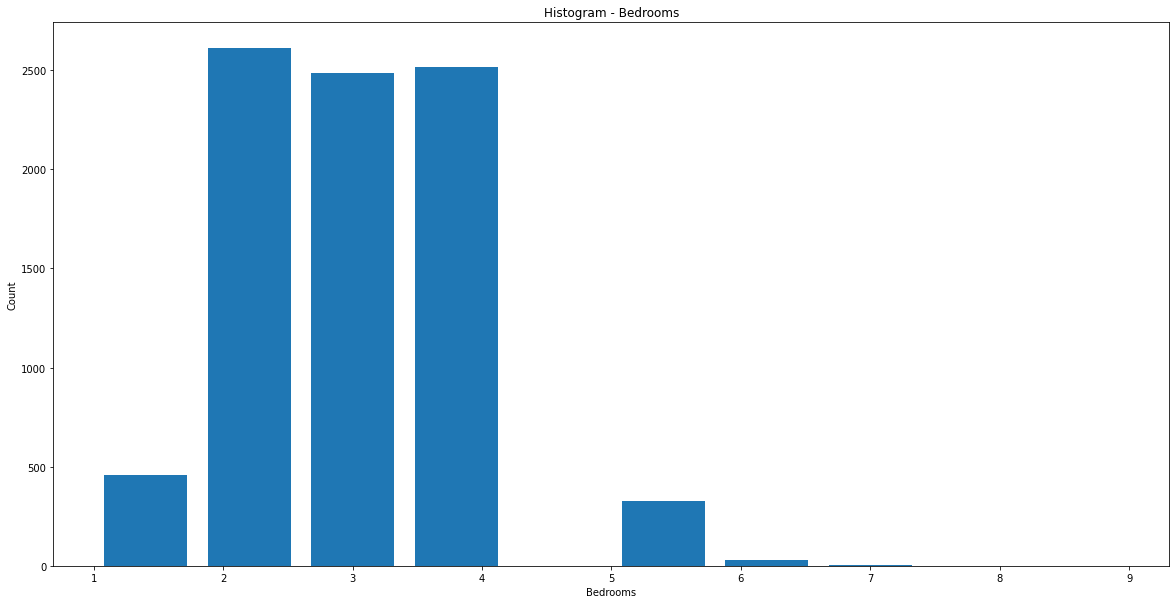

In [16]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(all_data.bedrooms, rwidth=0.8)
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title('Histogram - Bedrooms')

In [17]:
dummies = pd.get_dummies(all_data.street)
dummies = dummies.drop(columns=['other'])
dummies.head(3)

,Avenida Abraham Medina,Avenida Adolpho de Vasconcelos,Avenida Afonso Arinos de Melo Franco,Avenida Alda Garrido,Avenida Ator José Wilker,Avenida Ayrton Senna,Avenida Cláudio Besserman Vianna,Avenida Comandante Júlio de Moura,Avenida Cândido Portinari,Avenida Di Cavalcanti,...,Rua Marlo da Costa e Souza,Rua Mário Agostinelli,Rua Mário Covas Júnior,Rua Oscar Valdetaro,Rua Padre Alfredo Perez Gonzales,Rua Paulo Moura,Rua Professor Coutinho Fróis,Rua Queiros Júnior,Rua Vilhena de Morais,Rua das Bromélias da Península
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df11 = pd.concat([all_data.drop(columns=['street']), dummies], axis='columns')
df11.head()

,bedrooms,area,price,price_per_m2,Avenida Abraham Medina,Avenida Adolpho de Vasconcelos,Avenida Afonso Arinos de Melo Franco,Avenida Alda Garrido,Avenida Ator José Wilker,Avenida Ayrton Senna,...,Rua Marlo da Costa e Souza,Rua Mário Agostinelli,Rua Mário Covas Júnior,Rua Oscar Valdetaro,Rua Padre Alfredo Perez Gonzales,Rua Paulo Moura,Rua Professor Coutinho Fróis,Rua Queiros Júnior,Rua Vilhena de Morais,Rua das Bromélias da Península
0,4,165,2500000,15151.515152,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,55,750000,13636.363636,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,128,680000,5312.500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,70,960000,13714.285714,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,72,1100000,15277.777778,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X = df11.drop(columns=['price'])
X.head()

,bedrooms,area,price_per_m2,Avenida Abraham Medina,Avenida Adolpho de Vasconcelos,Avenida Afonso Arinos de Melo Franco,Avenida Alda Garrido,Avenida Ator José Wilker,Avenida Ayrton Senna,Avenida Cláudio Besserman Vianna,...,Rua Marlo da Costa e Souza,Rua Mário Agostinelli,Rua Mário Covas Júnior,Rua Oscar Valdetaro,Rua Padre Alfredo Perez Gonzales,Rua Paulo Moura,Rua Professor Coutinho Fróis,Rua Queiros Júnior,Rua Vilhena de Morais,Rua das Bromélias da Península
0,4,165,15151.515152,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,55,13636.363636,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,128,5312.500000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,70,13714.285714,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,72,15277.777778,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y = df11.price
y.head()

0    2500000
1     750000
2     680000
3     960000
4    1100000
Name: price, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression(normalize=False)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8145776608391828

In [44]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.81643382, 0.84217124, 0.3360899 , 0.74792041, 0.75824506])

In [23]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)




,model,best_score,best_params
0,linear_regression,0.700172,{'normalize': True}
1,lasso,0.700172,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.952230,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [24]:
X.columns

Index(['bedrooms', 'area', 'price_per_m2', 'Avenida Abraham Medina',
       'Avenida Adolpho de Vasconcelos',
       'Avenida Afonso Arinos de Melo Franco', 'Avenida Alda Garrido',
       'Avenida Ator José Wilker', 'Avenida Ayrton Senna',
       'Avenida Cláudio Besserman Vianna', 'Avenida Comandante Júlio de Moura',
       'Avenida Cândido Portinari', 'Avenida Di Cavalcanti',
       'Avenida Embaixador Abelardo Bueno', 'Avenida Flamboyants da Península',
       'Avenida Gastão Senges', 'Avenida General Felicíssimo Cardoso',
       'Avenida General Guedes da Fontoura', 'Avenida General Olyntho Pillar',
       'Avenida Gilberto Amado', 'Avenida Hildebrando de Araújo Góes',
       'Avenida Jaime Poggi', 'Avenida Jornalista Ricardo Marinho',
       'Avenida Jornalista Tim Lopes', 'Avenida João Cabral de Mello Neto',
       'Avenida João Carlos Machado', 'Avenida Luiz Aranha',
       'Avenida Lúcio Costa', 'Avenida Malibu',
       'Avenida Marechal Henrique Lott', 'Avenida Monsenhor Ascan

In [25]:
np.where(X.columns=='Rua Vilhena de Morais')[0][0]

83

In [42]:
def predict_price(street,m2,bedrooms, price_per_m2): 
    
    loc_index = np.where(X.columns==street)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bedrooms
    x[1] = m2   
    x[2] = price_per_m2
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

predict_price('Avenida Salvador Allende',100, 2, 11101)

1647655.5281992536

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

clf = DecisionTreeRegressor()
# Train Decision Tree Classifer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.2821019359936784

In [39]:
def predict_price2(street,m2,bedrooms, price_per_m2): 
    
    loc_index = np.where(X.columns==street)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bedrooms
    x[1] = m2
    x[2] = price_per_m2
    if loc_index >= 0:
        x[loc_index] = 1

    return clf.predict([x])[0]

In [40]:
predict_price2('Avenida Flamboyants da Península',100, 2, 11101)

1100000.0